<a href="https://colab.research.google.com/github/Naveen-Nanda/3d-prostate-segmentation/blob/master/Catboost_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("/content/Data sharing BLA SOW fields_2021.11.29.FINAL.xlsx",index_col=False)







In [63]:
df.shape

(75, 32)

In [64]:
df['Past Pregnancy'].value_counts()

P1G0A0       25
P2G0M1        9
P1G0A0        7
P1G0A0M0      5
P2G0M1        4
P3G1M1        4
P3G0A1M1      3
P2G1A0        2
P3G1M1        2
P4G1A1M1      2
P2G0A1        1
P2G0A0M1      1
P6G1M4        1
P4G3          1
P2G0A1        1
P4G0M3        1
P1G0M1        1
P4G2A1        1
P3G2A1        1
P4G1A1M2      1
P3G0M2        1
P5G2A1M2      1
Name: Past Pregnancy, dtype: int64

In [65]:
def sample(value):
  return value[1]

In [66]:
df['Total_Pregnancy'] = df['Past Pregnancy'].apply(lambda x:sample(x))

#res_first = test_str[0:len(test_str)//2]
#res_second = test_str[len(test_str)//2 if len(test_str)%2 == 0
#                                 else ((len(test_str)//2)+1):]

In [67]:
df['Total_Pregnancy'].value_counts()

1    38
2    18
3    11
4     6
5     1
6     1
Name: Total_Pregnancy, dtype: int64

In [68]:
def sample2(value):
  try:
    if value[4]=='A':
      return value[5]
    else:
      return 0
  except:
    return 0
      
  

In [69]:
df['Abortions'] = df['Past Pregnancy'].apply(lambda x:sample2(x))

In [70]:
df['Abortions'].value_counts()

0    40
0    24
1    11
Name: Abortions, dtype: int64

In [71]:
def sample3(value):
  try:
    if value[4]=='M':
      return value[5]
    elif value[6] == 'M':
      return value[7]
    else:
      return 0
  except:
    return 0

In [72]:
df['Miscarriage'] = df['Past Pregnancy'].apply(lambda x:sample3(x))

In [73]:
df['Miscarriage'].value_counts()

0    39
1    26
0     5
2     3
4     1
3     1
Name: Miscarriage, dtype: int64

In [74]:
df['Allergies_1'] = df.Allergies.str.split(' ', expand = True)[0]
df['Allergies_2'] = df.Allergies.str.split(' ', expand = True)[1]

In [75]:
df[['House Type','No_of_Living']] = df['Living Conditions'].str.split('+',expand = True)

In [76]:
df['PMH_1'] = df['PMH '].str.split(',', expand = True)[0]
df['PMH_2'] = df['PMH '].str.split(',', expand = True)[1]
df['PMH_3'] = df['PMH '].str.split(',', expand = True)[2]

In [77]:




df['Allergies_1'] = df['Allergies_1'].replace("Peanut","Peanuts")
df['Allergies_2'] = df['Allergies_2'].replace("",'None')

df['PMH_1'] = df['PMH_1'].replace("",'None')
df['PMH_2'] = df['PMH_2'].replace("HTN,",'HTN')


df['Health_Habits_1'] = df['Health Habits'].str.split('+', expand = True)[0]
df['Health_Habits_2'] = df['Health Habits'].str.split('+', expand = True)[1]








In [78]:
df['Class_Attended_1'] = df['Class Attended'].str.split('/', expand = True)[0]
df['Class_Attended_2'] = df['Class Attended'].str.split('/', expand = True)[1]
df['Class_Attended_3'] = df['Class Attended'].str.split('/', expand = True)[2]

In [79]:
df['Medication_1'] = df['Medications'].str.split(',', expand = True)[0]
df['Medication_2'] = df['Medications'].str.split(',', expand = True)[1]
df['Medication_3'] = df['Medications'].str.split(',', expand = True)[2]

In [ ]:
df.columns

Index(['Location', 'Patient Identifier', 'Age', 'Race', 'Marital Status',
       'Gestational Age at time of joining (weeks)', 'PSH', 'Past Pregnancy',
       'Food Sources/Insecurities', 'Education Level',
       'Previous Utilization of Telehealth/Telemonitoring',
       'Previous Breastfeeding', 'Intention to Breastfeed',
       'Birthplan Initiation', 'Do You Have Knowledge You Need (@baseline)',
       'Do You Know Where To Get Support (@baseline)',
       'Self Advocacy (@baseline)', 'Experiencing Violence',
       '# of 1:1 Session', 'Support Group', 'Access Point', 'Type of Delivery',
       'Weeks of Gestation@ delivery', 'Baby Weight at Birth', 'NICU',
       'Postpartum Visits (with BLA)',
       'BLA Increased My Knowledge (@exit interview)',
       'BLA Improved My Outcomes  (@exit interview)',
       'BLA Was Unbiased and Supportive  (@exit interview)',
       'I Will Recommend BLA to Others  (@exit interview)',
       'Do you trust your physician  ', 'House Type', 'No_of

In [80]:
df.columns

Index(['Location', 'Age', 'Race', 'Marital Status',
       'Gestational Age at time of joining (weeks)', 'PMH ', 'PSH',
       'Health Habits', 'Past Pregnancy', 'Living Conditions',
       'Food Sources/Insecurities', 'Education Level', 'Medications',
       'Allergies', 'Previous Utilization of Telehealth/Telemonitoring',
       'Previous Breastfeeding', 'Intention to Breastfeed',
       'Birthplan Initiation', 'Do You Have Knowledge You Need (@baseline)',
       'Do You Know Where To Get Support (@baseline)',
       'Self Advocacy (@baseline)', 'Experiencing Violence',
       '# of 1:1 Session', 'Class Attended', 'Support Group', 'Access Point',
       'Type of Delivery', 'Weeks of Gestation@ delivery',
       'Baby Weight at Birth', 'NICU', 'Postpartum Visits (with BLA)',
       'Do you trust your physician  ', 'Total_Pregnancy', 'Abortions',
       'Miscarriage', 'Allergies_1', 'Allergies_2', 'House Type',
       'No_of_Living', 'PMH_1', 'PMH_2', 'PMH_3', 'Health_Habits_1',
      

In [82]:
df.to_csv("Final_allraces.csv")

In [ ]:
df.dtypes

Location                                               object
Patient Identifier                                      int64
Age                                                     int64
Race                                                   object
Marital Status                                         object
Gestational Age at time of joining (weeks)              int64
PSH                                                    object
Past Pregnancy                                         object
Food Sources/Insecurities                              object
Education Level                                        object
Previous Utilization of Telehealth/Telemonitoring      object
Previous Breastfeeding                                 object
Intention to Breastfeed                                object
Birthplan Initiation                                   object
Do You Have Knowledge You Need (@baseline)             object
Do You Know Where To Get Support (@baseline)           object
Self Adv

In [ ]:
df.to_csv("Final_Allraces.csv")

In [ ]:
!pip install category_encoders
import category_encoders as ce

In [ ]:
temp_df = df

In [ ]:
df['Race'].value_counts()

Black     37
Black     23
Name: Race, dtype: int64

In [ ]:
new_df = df[df['Race']=='Black']

In [ ]:
new_df['Race'].value_counts()

Black    23
Name: Race, dtype: int64

In [ ]:
df = df.fillna('None')

In [ ]:
df.dtypes

Location                                               object
Patient Identifier                                      int64
Age                                                     int64
Race                                                   object
Marital Status                                         object
Gestational Age at time of joining (weeks)              int64
PSH                                                    object
Past Pregnancy                                         object
Food Sources/Insecurities                              object
Education Level                                        object
Previous Utilization of Telehealth/Telemonitoring      object
Previous Breastfeeding                                 object
Intention to Breastfeed                                object
Birthplan Initiation                                   object
Do You Have Knowledge You Need (@baseline)             object
Do You Know Where To Get Support (@baseline)           object
Self Adv

In [ ]:
df = df.drop(['Past Pregnancy','Patient Identifier','I Will Recommend BLA to Others  (@exit interview)','BLA Was Unbiased and Supportive  (@exit interview)','BLA Improved My Outcomes  (@exit interview)','BLA Increased My Knowledge (@exit interview)'],axis=1)

In [ ]:
df["Location"] = df["Location"].astype('category')
df["Race"] = df["Race"].astype('category')
df["Marital Status"] = df["Marital Status"].astype('category')
df["PSH"] = df["PSH"].astype('category')
df["Food Sources/Insecurities"] = df["Food Sources/Insecurities"].astype('category')
df["Previous Utilization of Telehealth/Telemonitoring"] = df["Previous Utilization of Telehealth/Telemonitoring"].astype('category')
df["Previous Breastfeeding"] = df["Previous Breastfeeding"].astype('category')
df["Intention to Breastfeed"] = df["Intention to Breastfeed"].astype('category')
df["Birthplan Initiation"] = df["Birthplan Initiation"].astype('category')
df["Do You Have Knowledge You Need (@baseline)"] = df["Do You Have Knowledge You Need (@baseline)"].astype('category')
df["Do You Know Where To Get Support (@baseline)"] = df["Do You Know Where To Get Support (@baseline)"].astype('category')
df["Self Advocacy (@baseline)"] = df["Self Advocacy (@baseline)"].astype('category')
df["Experiencing Violence"] = df["Experiencing Violence"].astype('category')
df["Education Level"] = df["Education Level"].astype('category')
df["Support Group"] = df["Support Group"].astype('category')
df["Access Point"] = df["Access Point"].astype('category')
df["Type of Delivery"] = df["Type of Delivery"].astype('category')
df["NICU"] = df["NICU"].astype('category')
#df["BLA Increased My Knowledge (@exit interview)"] = df["BLA Increased My Knowledge (@exit interview)"].astype('category')
#df["BLA Improved My Outcomes  (@exit interview)"] = df["BLA Improved My Outcomes  (@exit interview)"].astype('category')
#df["BLA Was Unbiased and Supportive  (@exit interview)"] = df["BLA Was Unbiased and Supportive  (@exit interview)"].astype('category')
#df["I Will Recommend BLA to Others  (@exit interview)"] = df["I Will Recommend BLA to Others  (@exit interview)"].astype('category')
df["Do you trust your physician\xa0\xa0"] = df["Do you trust your physician\xa0\xa0"].astype('category')
df["House Type"] = df["House Type"].astype('category')
df["Medication_1"] = df["Medication_1"].astype('category')
df["Medication_2"] = df["Medication_2"].astype('category')
df["Medication_3"] = df["Medication_3"].astype('category')
df["Allergies_1"] = df["Allergies_1"].astype('category')
df["Allergies_2"] = df["Allergies_2"].astype('category')
df["PMH_1"] = df["PMH_1"].astype('category')
df["PMH_2"] = df["PMH_2"].astype('category')
df["PMH_3"] = df["PMH_3"].astype('category')
df["Health_Habits_1"] = df["Health_Habits_1"].astype('category')
df["Health_Habits_2"] = df["Health_Habits_2"].astype('category')
df["Class_Attended_1"] = df["Class_Attended_1"].astype('category')
df["Class_Attended_2"] = df["Class_Attended_2"].astype('category')
df["Class_Attended_3"] = df["Class_Attended_3"].astype('category')
df["Total_Pregnancy"] = df["Total_Pregnancy"].astype('category')
df["Abortions"] = df["Abortions"].astype('category')
df["Miscarriage"] = df["Miscarriage"].astype('category')



In [ ]:
temp_df_1 = df

In [ ]:
df.dtypes

Location                                             category
Age                                                     int64
Race                                                 category
Marital Status                                       category
Gestational Age at time of joining (weeks)              int64
PSH                                                  category
Food Sources/Insecurities                            category
Education Level                                      category
Previous Utilization of Telehealth/Telemonitoring    category
Previous Breastfeeding                               category
Intention to Breastfeed                              category
Birthplan Initiation                                 category
Do You Have Knowledge You Need (@baseline)           category
Do You Know Where To Get Support (@baseline)         category
Self Advocacy (@baseline)                            category
Experiencing Violence                                category
# of 1:1

In [ ]:
df["Location"] = df["Location"].cat.codes
df["Race"] = df["Race"].cat.codes
df["Marital Status"] = df["Marital Status"].cat.codes
df["PSH"] = df["PSH"].cat.codes
df["Food Sources/Insecurities"] = df["Food Sources/Insecurities"].cat.codes
df["Previous Utilization of Telehealth/Telemonitoring"] = df["Previous Utilization of Telehealth/Telemonitoring"].cat.codes
df["Previous Breastfeeding"] = df["Previous Breastfeeding"].cat.codes
df["Intention to Breastfeed"] = df["Intention to Breastfeed"].cat.codes
df["Birthplan Initiation"] = df["Birthplan Initiation"].cat.codes
df["Do You Have Knowledge You Need (@baseline)"] = df["Do You Have Knowledge You Need (@baseline)"].cat.codes
df["Do You Know Where To Get Support (@baseline)"] = df["Do You Know Where To Get Support (@baseline)"].cat.codes
df["Self Advocacy (@baseline)"] = df["Self Advocacy (@baseline)"].cat.codes
df["Experiencing Violence"] = df["Experiencing Violence"].cat.codes
df["Support Group"] = df["Support Group"].cat.codes
df["Access Point"] = df["Access Point"].cat.codes
df["Type of Delivery"] = df["Type of Delivery"].cat.codes
df["NICU"] = df["NICU"].cat.codes
#df["BLA Increased My Knowledge (@exit interview)"] = df["BLA Increased My Knowledge (@exit interview)"].cat.codes
#df["BLA Improved My Outcomes  (@exit interview)"] = df["BLA Improved My Outcomes  (@exit interview)"].cat.codes
#df["BLA Was Unbiased and Supportive  (@exit interview)"] = df["BLA Was Unbiased and Supportive  (@exit interview)"].cat.codes
#df["I Will Recommend BLA to Others  (@exit interview)"] = df["I Will Recommend BLA to Others  (@exit interview)"].cat.codes
df["Do you trust your physician\xa0\xa0"] = df["Do you trust your physician\xa0\xa0"].cat.codes
df["House Type"] = df["House Type"].cat.codes
df["Medication_1"] = df["Medication_1"].cat.codes
df["Medication_2"] = df["Medication_2"].cat.codes
df["Medication_3"] = df["Medication_3"].cat.codes
df["Allergies_1"] = df["Allergies_1"].cat.codes
df["Allergies_2"] = df["Allergies_2"].cat.codes
df["PMH_1"] = df["PMH_1"].cat.codes
df["PMH_2"] = df["PMH_2"].cat.codes
df["PMH_3"] = df["PMH_3"].cat.codes
df["Health_Habits_1"] = df["Health_Habits_1"].cat.codes
df["Health_Habits_2"] = df["Health_Habits_2"].cat.codes
df["Education Level"] = df["Education Level"].cat.codes
df["Class_Attended_1"] = df["Class_Attended_1"].cat.codes
df["Class_Attended_2"] = df["Class_Attended_2"].cat.codes
df["Class_Attended_3"] = df["Class_Attended_3"].cat.codes
df["Total_Pregnancy"] = df["Total_Pregnancy"].cat.codes
df["Abortions"] = df["Abortions"].cat.codes
df["Miscarriage"] = df["Miscarriage"].cat.codes


In [ ]:
temp_df_final = df

In [ ]:
temp_df_final = temp_df_final.drop(['NICU'],axis=1)

In [ ]:
X = temp_df_final
y = df['NICU']

In [ ]:
X.shape

(60, 42)

In [ ]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    3
20    1
21    1
22    3
23    1
24    1
25    1
26    1
27    1
28    1
29    3
30    3
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    3
42    1
43    1
44    1
45    1
46    1
47    0
48    0
49    0
50    0
51    0
52    2
53    1
54    1
55    3
56    1
57    1
58    1
59    1
Name: NICU, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=500,
    #random_seed=42,
    learning_rate=1,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    verbose=False,
    plot=True
)

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
final = clf.predict(data=X_val)

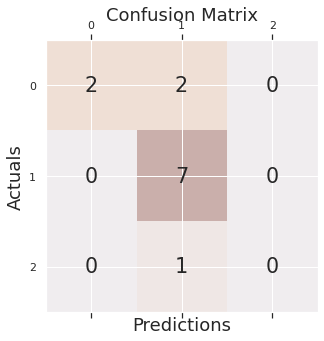

In [ ]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=final)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("The accuracy of the Model is {}".format(accuracy_score(y_val,final)))
print('F1 Score: %.3f' % f1_score(y_val,final,average = 'weighted'))

The accuracy of the Model is 0.75
F1 Score: 0.703


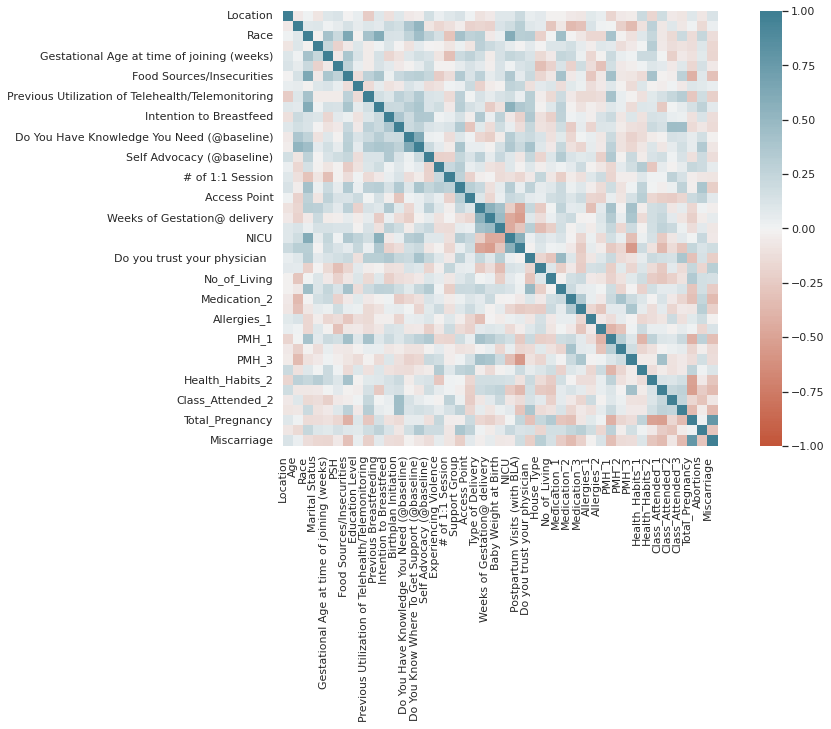

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
);

In [ ]:
corr_matrix = df.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
#df.drop(df[to_drop], axis=1)

In [ ]:
to_drop

['Food Sources/Insecurities',
 'Previous Breastfeeding',
 'Do You Know Where To Get Support (@baseline)',
 'Weeks of Gestation@ delivery',
 'NICU',
 'Postpartum Visits (with BLA)',
 'PMH_3',
 'Total_Pregnancy',
 'Miscarriage']

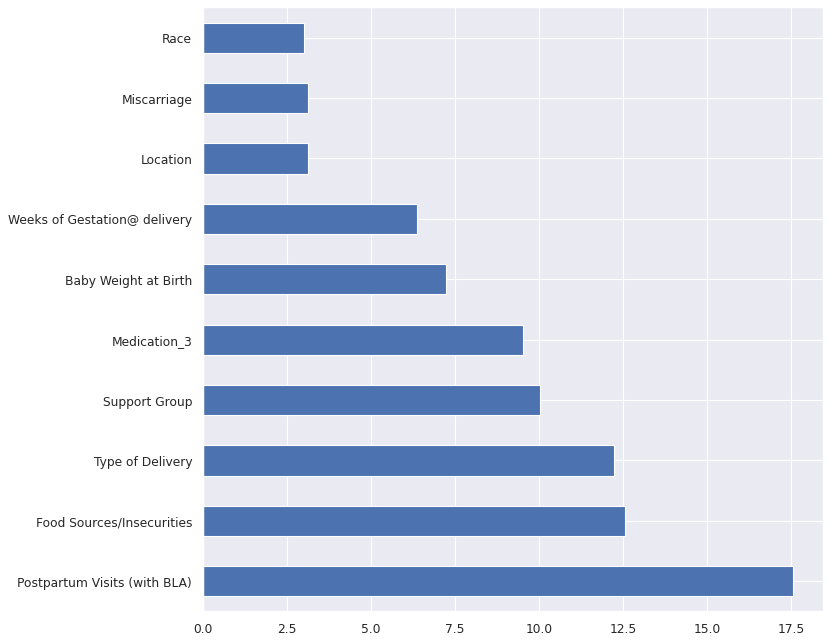

In [ ]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
figure(figsize=(10, 10), dpi=80)

feat_importances.nlargest(10).plot(kind='barh')

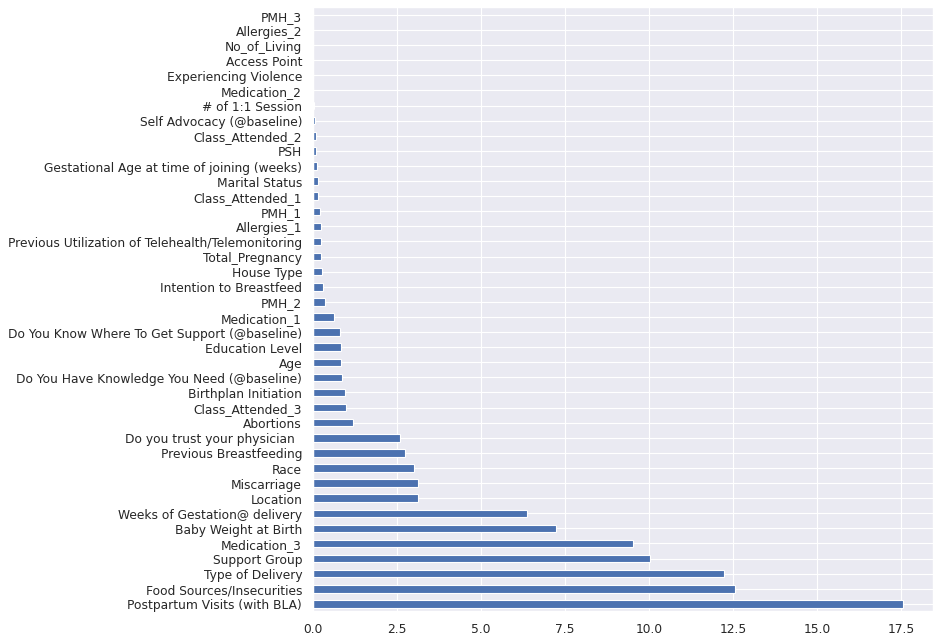

In [ ]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
figure(figsize=(10, 10), dpi=80)

feat_importances.nlargest(40).plot(kind='barh')

In [ ]:
df['Duration'] = df['Weeks of Gestation@ delivery'] - df['Gestational Age at time of joining (weeks)']

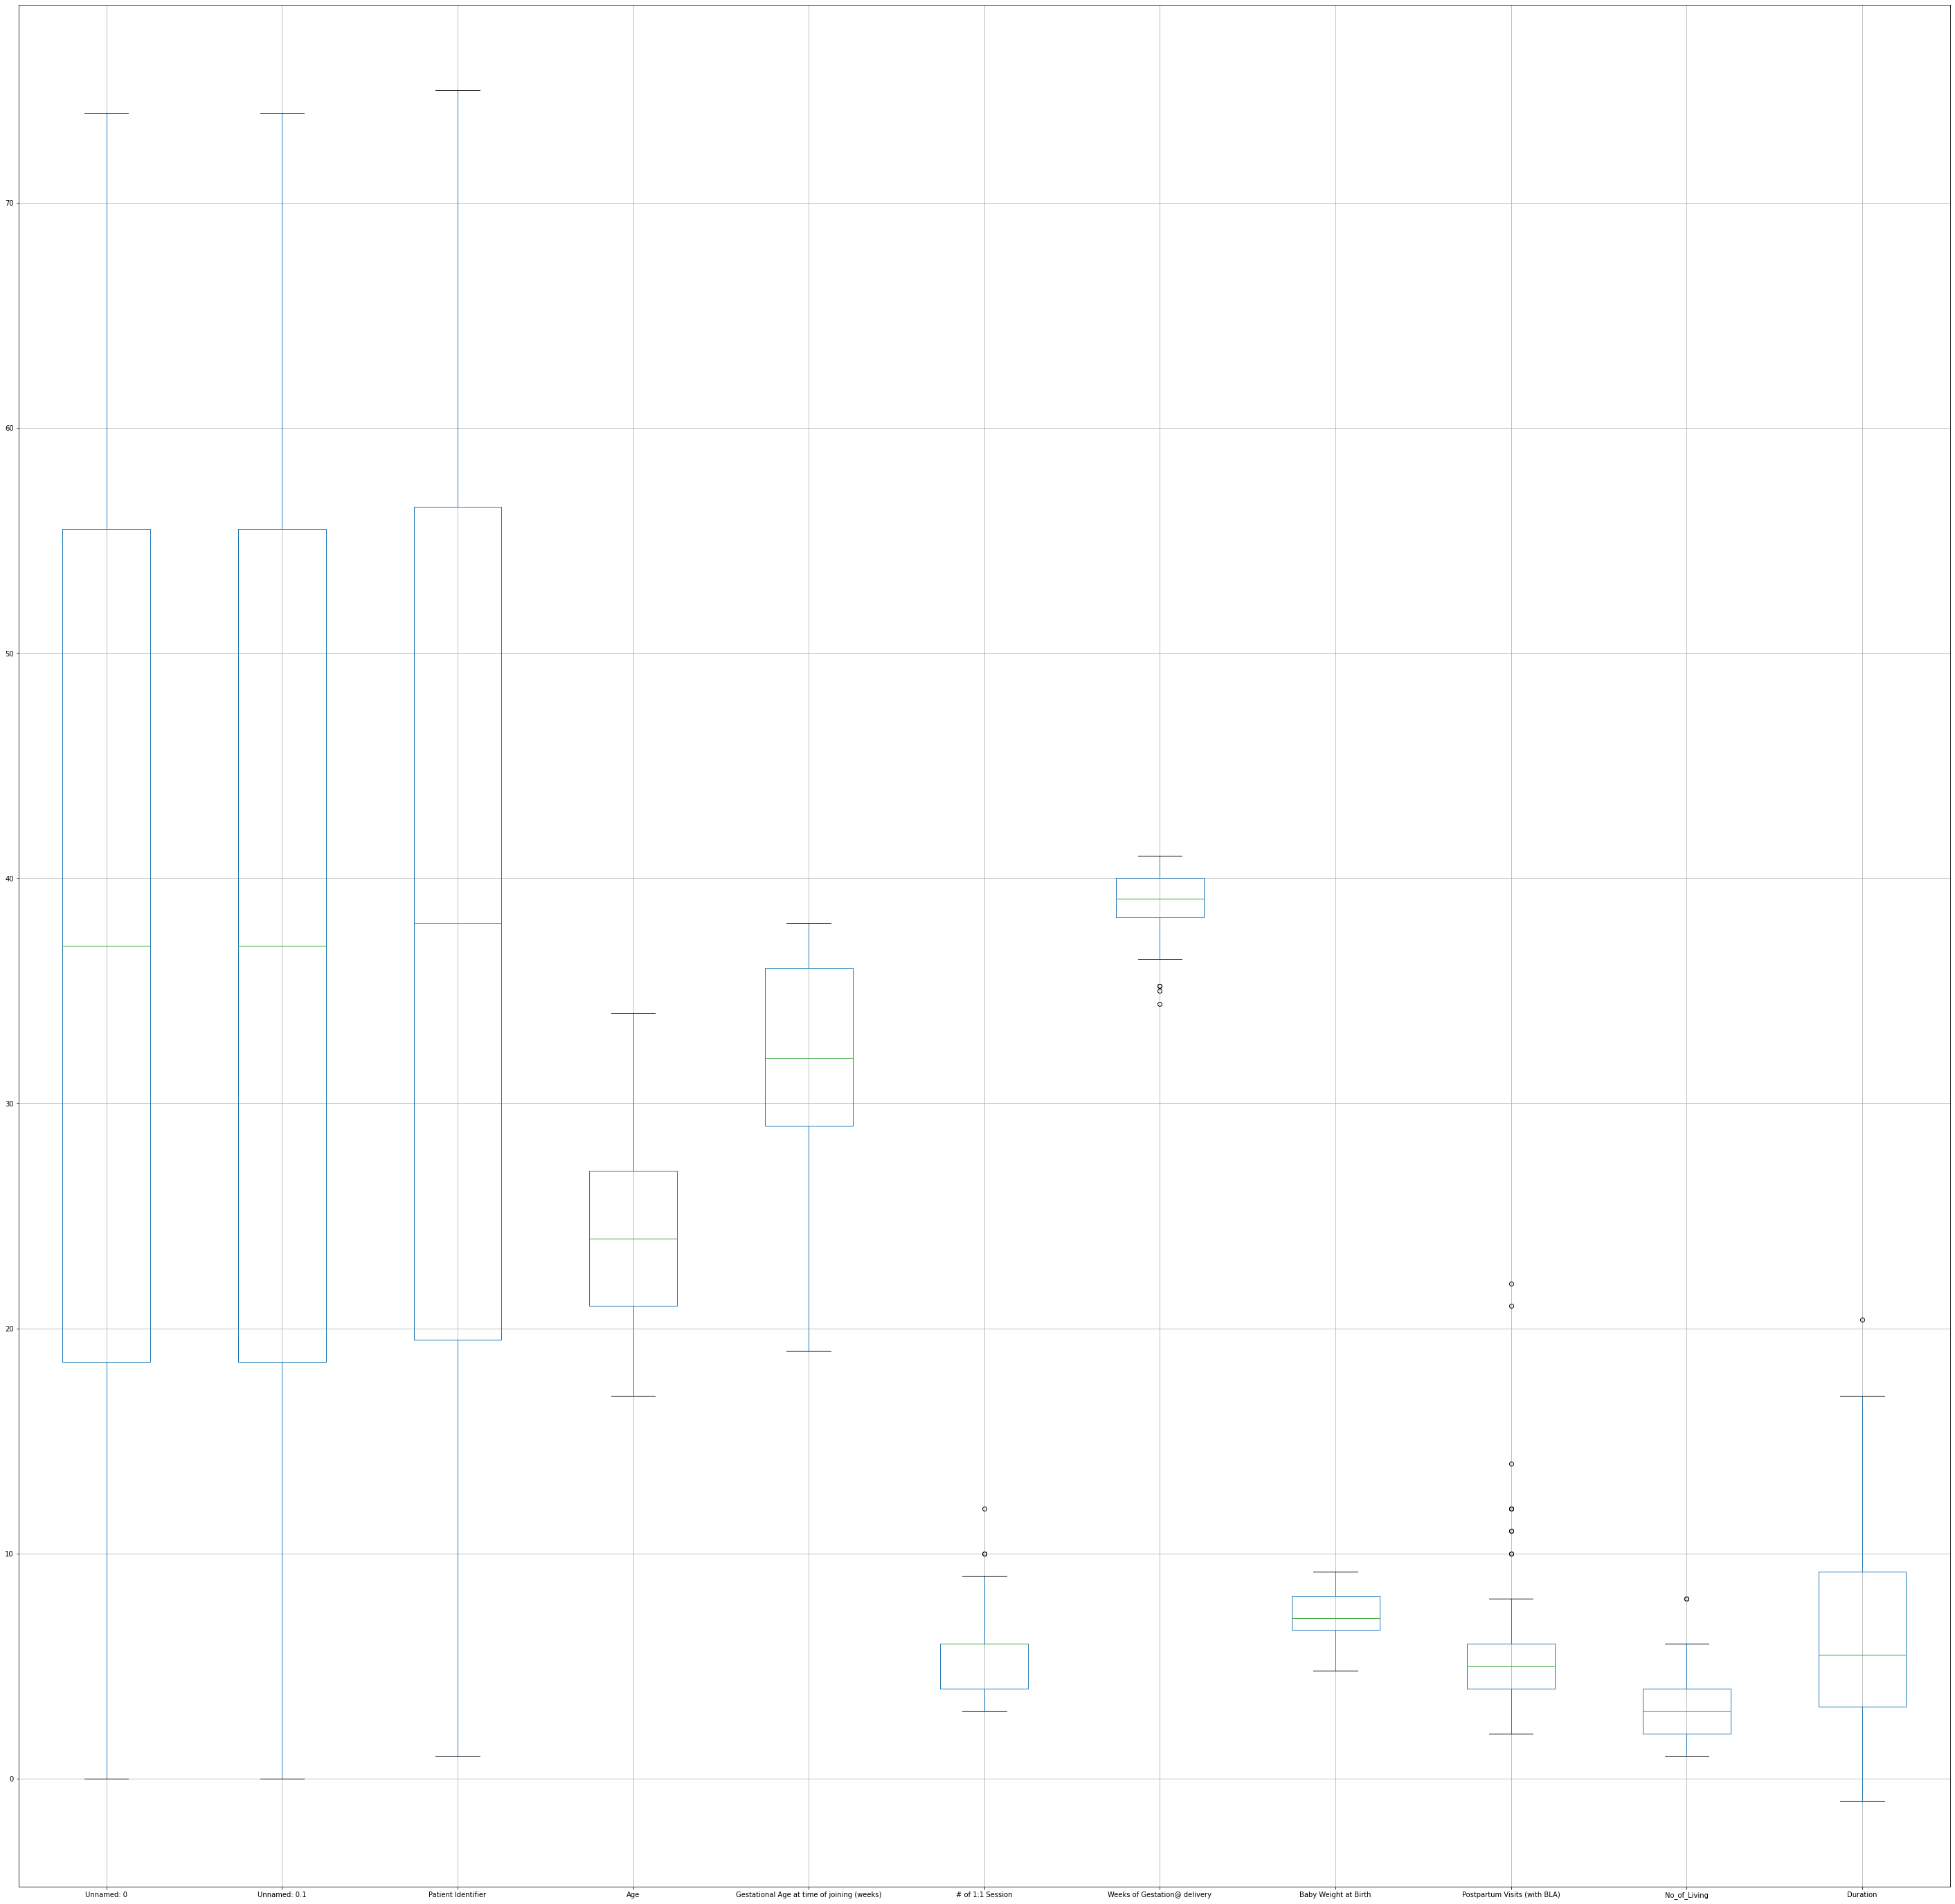

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(return_type='axes',figsize=(50,50))


In [ ]:
df.dtypes

Location                                                 int8
Patient Identifier                                      int64
Age                                                     int64
Race                                                     int8
Marital Status                                           int8
Gestational Age at time of joining (weeks)              int64
PSH                                                      int8
Past Pregnancy                                           int8
Food Sources/Insecurities                                int8
Education Level                                          int8
Previous Utilization of Telehealth/Telemonitoring        int8
Previous Breastfeeding                                   int8
Intention to Breastfeed                                  int8
Birthplan Initiation                                     int8
Do You Have Knowledge You Need (@baseline)               int8
Do You Know Where To Get Support (@baseline)             int8
Self Adv

In [ ]:
df['Type of Delivery'].value_counts()

5    45
4    19
0     5
2     3
1     2
3     1
Name: Type of Delivery, dtype: int64